<a href="https://colab.research.google.com/github/enguyen120/BigDataProject/blob/main/machine_learning_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get Data

In [ ]:
# imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from matplotlib.ticker import NullFormatter
from sklearn import utils
from sklearn import metrics
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [ ]:
# Mount GDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read data
df = pd.read_csv('/content/drive/MyDrive/Schoolwork/Big Data Final/refactor/refactored_tfdif.csv')
# df = pd.read_csv('/content/drive/MyDrive/Big Data Final/refactor/refactored_tfidf.csv')

In [ ]:
df.head()

,Unnamed: 0,aaron,aaronkleinshow,ab,aback,abadi,abandon,abandoned,abandoning,abandonment,...,zip,zombie,zone,zoo,zoom,zooming,zucker,zuckerberg,leftness,article_source
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.015958,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,New York Times
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,New York Times
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,New York Times
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.019500,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,New York Times
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,New York Times


# General Analysis

In [ ]:
# Double-check how many articles there are for each value in "leftness", and what % they are of total article count
# https://stackoverflow.com/questions/44111307/python-pandas-count-rows-based-on-column
test_df = df.groupby(['leftness'], sort=False).size().reset_index(name='Count')
test_df['% of Total'] = (test_df['Count'] / test_df['Count'].sum()) * 100
print(test_df)

   leftness  Count  % of Total
0       1.0   4453   55.767063
1       0.0   2700   33.813400
2       0.5    832   10.419537


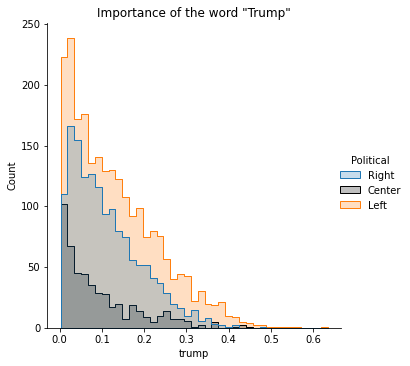

In [ ]:
# Check distribution of TF-IDF value (word importance) of the word "Trump" in the different articles
# https://stackoverflow.com/questions/67157280/using-seaborn-displot-i-am-unable-to-specify-the-hue-to-separate-three-categorie
# https://stackoverflow.com/questions/45201514/how-to-edit-a-seaborn-legend-title-and-labels-for-figure-level-functions
# https://stackoverflow.com/questions/46173419/seaborn-change-color-according-to-hue-name 
import seaborn as sns
g = sns.displot(df[df['trump'] > 0], x='trump', hue='leftness', 
                palette=["C0", "k", "C1"], element="step").set(title='Importance of the word "Trump"')
# legend title
new_title = 'Political'
g._legend.set_title(new_title)
# legend labels
new_labels = ['Right', 'Center', 'Left']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

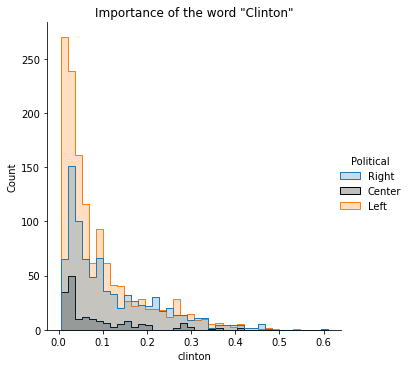

In [ ]:
# Check distribution of TF-IDF value (word importance) of the word "Clinton" in the different articles
import seaborn as sns
g = sns.displot(df[df['clinton'] > 0], x='clinton', hue='leftness', 
                palette=["C0", "k", "C1"], element="step").set(title='Importance of the word "Clinton"')
# legend title
new_title = 'Political'
g._legend.set_title(new_title)
# legend labels
new_labels = ['Right', 'Center', 'Left']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

# Logistic Regression - Bias

In [ ]:
# Stratified K-Fold doesn't work with multiple values in the target array,
# so we must remove all rows with a 'leftness' value of 0.5
x = df[df['leftness'] != 0.5]
x = x.loc[:, ~x.columns.isin(['leftness', 'article_source', 'Unnamed: 0'])]
y = df[df['leftness'] != 0.5]
y = y['leftness']

In [ ]:
print(x.shape, y.shape)

(7153, 16725) (7153,)


In [ ]:
# create a stratified k-fold object with 10 splits
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
# split the indices according to the fold, get data based on indices
for train_index, test_index in skf.split(x, y):
  x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
  y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

In [ ]:
# create + train logistic regression model
logreg = LogisticRegression()
model = logreg.fit(x_train_fold, y_train_fold)

In [ ]:
# use model to classify testing data, check model accuracy
predictions = model.predict(x_test_fold)
print("the accuracy score for our logistic regression model is ", round(accuracy_score(y_test_fold, predictions) * 100, 2), "%", sep='')

the accuracy score for our logistic regression model is 81.12%


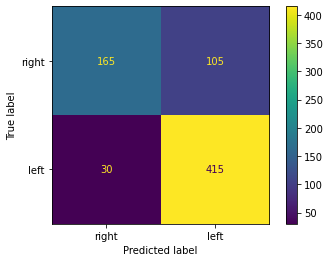

In [ ]:
# create confusion matrix 
actual = y_test_fold
predicted = predictions

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['right', 'left'])

cm_display.plot()
plt.show()

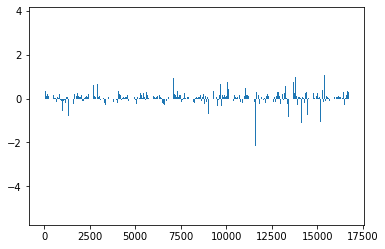

In [ ]:
# get feature importance 
importance = model.coef_[0] 
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# find most + least important features (both name + importance)
feat_imp_zip = zip(model.feature_names_in_, model.coef_[0])
important_features = sorted(tuple(feat_imp_zip), key = lambda x: abs(x[1]), reverse=True)
print("Most important 10 features")
print("\t", "\n\t".join([str(x) for x in important_features[0:10]]), sep = '')
print("\n")
print("Least important 10 features")
print("\t", "\n\t".join([str(x) for x in important_features[-10:]]), sep = '' )

Most important 10 features
	('breitbart', -5.306806982034431)
	('follow', -4.64292371525119)
	('fox', -3.7617111683186772)
	('cnn', 3.7045138017588015)
	('prediction', -3.3611188336224194)
	('percent', -3.3452453305138596)
	('mr', 3.0438166852549045)
	('npr', 2.9099418760226596)
	('twitter', -2.703878301030436)
	('map', -2.70057515081719)


Least important 10 features
	('swamynathan', 0.0)
	('tillerson', 0.0)
	('vantiv', 0.0)
	('volz', 0.0)
	('walcott', 0.0)
	('worldpay', 0.0)
	('xiaomi', 0.0)
	('yashaswini', 0.0)
	('yt', 0.0)
	('zieminski', 0.0)


# Random Forest Model - Bias

In [ ]:
# random forest model 
rfc = RandomForestClassifier()
forest_model = rfc.fit(x_train_fold, y_train_fold)

In [ ]:
predictions1 = forest_model.predict(x_test_fold)
# accuracy score --> how accurate is our model in predicting the leftness of an article
print("the accuracy score for our random forest is ", round(accuracy_score(y_test_fold, predictions1) * 100, 2), "%", sep='')

the accuracy score for our random forest is 77.76%


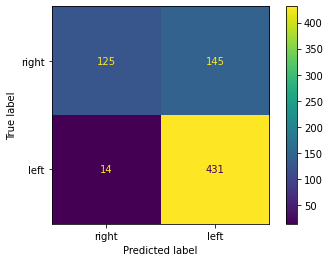

In [ ]:
# confusion matrix 
actual = y_test_fold
predicted = predictions1

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['right', 'left'])

cm_display.plot()
plt.show()

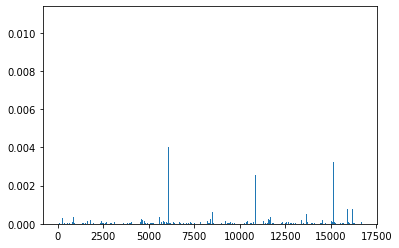

In [ ]:
# feature importance 
forest_importance = forest_model.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(forest_importance))], forest_importance)
plt.show()

In [ ]:
# find most + least important features (both name + importance)
forest_feat_imp_zip = zip(forest_model.feature_names_in_, forest_model.feature_importances_)
forest_important_features = sorted(tuple(forest_feat_imp_zip), key = lambda x: abs(x[1]), reverse=True)
print("Most important 10 features")
print("\t", "\n\t".join([str(x) for x in forest_important_features[0:10]]), sep = '')
print("\n")
print("Least important 10 features")
print("\t", "\n\t".join([str(x) for x in forest_important_features[-10:]]), sep = '' )

Most important 10 features
	('follow', 0.010847651300438809)
	('breitbart', 0.010787164083514428)
	('twitter', 0.007622907518721526)
	('cnn', 0.004558850717966741)
	('fox', 0.004025414422017306)
	('prediction', 0.003713874501682345)
	('like', 0.003279086794815597)
	('time', 0.003229275830119046)
	('projection', 0.0031398204126973465)
	('map', 0.003127812074233638)


Least important 10 features
	('zeitgeist', 0.0)
	('zengerle', 0.0)
	('zeroed', 0.0)
	('zhang', 0.0)
	('zieminski', 0.0)
	('zika', 0.0)
	('zimbabwe', 0.0)
	('zip', 0.0)
	('zoom', 0.0)
	('zooming', 0.0)
